<a href="https://colab.research.google.com/github/braveendran27/OCV_2_Proj3/blob/master/Proj3_yolov4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# the notebook expects OpenCV/C2_P3 folder in My Driver
#%cd /content/drive/My\ Drive/



Mounted at /content/drive
/content/drive/My Drive


In [ ]:
#1. Downloading the repo 
#2. building darknet 
#3. downloading the trainign images and test images

!git clone https://github.com/braveendran27/OCV_2_Proj3.git
%cd OCV_2_Proj3






Cloning into 'OCV_2_Proj3'...
remote: Enumerating objects: 365, done.
remote: Counting objects: 100% (365/365), done.
remote: Compressing objects: 100% (305/305), done.
remote: Total 365 (delta 101), reused 290 (delta 47), pack-reused 0
Receiving objects: 100% (365/365), 7.48 MiB | 8.97 MiB/s, done.
Resolving deltas: 100% (101/101), done.
/content/drive/My Drive/OCV_2_Proj3


In [ ]:
#building darknet : Darknet source code is already included as a part of my repo
!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
print("Building. . . It might take 2 minutes")
!make &> build_log.txt
print("Build completed.")
%cd ..

Cloning into 'darknet'...
remote: Enumerating objects: 15316, done.
remote: Total 15316 (delta 0), reused 0 (delta 0), pack-reused 15316
Receiving objects: 100% (15316/15316), 13.72 MiB | 5.15 MiB/s, done.
Resolving deltas: 100% (10408/10408), done.
Checking out files: 100% (2043/2043), done.
/content/drive/My Drive/OCV_2_Proj3/darknet
Building. . . It might take 2 minutes
Build completed.
/content/drive/My Drive/OCV_2_Proj3


In [ ]:

!mkdir mask_no-mask_dataset
%cd mask_no-mask_dataset
#get the training images
!wget "https://www.dropbox.com/s/uq0x32w70c390fb/mask_no-mask_dataset.zip?dl=1" -O mask_no-mask_dataset.zip
!unzip mask_no-mask_dataset.zip &> /dev/null
%cd ..

%cd test
!wget "https://www.dropbox.com/s/pds0w3z5y7w89oz/test-video1.mp4?dl=1" -O ./test-video1.mp4
!wget "https://www.dropbox.com/s/sqwu0ktdtlxtdsd/test-video2.mp4?dl=1" -O ./test-video2.mp4
%cd ..

/content/drive/My Drive/OCV_2_Proj3/mask_no-mask_dataset
--2021-10-14 15:49:42--  https://www.dropbox.com/s/uq0x32w70c390fb/mask_no-mask_dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/uq0x32w70c390fb/mask_no-mask_dataset.zip [following]
--2021-10-14 15:49:42--  https://www.dropbox.com/s/dl/uq0x32w70c390fb/mask_no-mask_dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucab05ec225ab7f137945699cc6a.dl.dropboxusercontent.com/cd/0/get/BYAyWv0CP9AMkZ8V9fLQQjsXM5SvXBJ65961vC-a5swzC60PIzhWe-1pxUfY8G-JzV83ZzucQgeLe8c4iiPOabV5dTskmmFtB3H-M5p84WnnD3VpXmM7w-Mbf0UzdRgy4Dwy6LXVSfTvxZhAXKfy0XTg/file?dl=1# [following]
--2021-10-14 15:49:42--  https://ucab05ec225ab7f137945699cc6a.dl.dropboxusercontent.com/cd/0

In [ ]:
#trainign yolo v4
%cd yolov4/
!mkdir maskbackup
!mkdir output
#download the initial weights darknet53.conv
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1JKF-bdIklxOOVy-2Cr5qdvjgGpmGfcbp" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1JKF-bdIklxOOVy-2Cr5qdvjgGpmGfcbp" -o yolov4.conv.137
#start the training
!./../darknet/darknet detector train yolov4-mask-setup.data yolov4-obj.cfg ./yolov4.conv.137 -dont_show -map 2> train_log.txt




Streaming output truncated to the last 5000 lines.
 (next mAP calculation at 800 iterations) 
 Last accuracy mAP@0.50 = 68.93 %, best = 68.93 % 
 724: 4.582599, 5.972184 avg loss, 0.000100 rate, 6.878046 seconds, 46336 images, 9.428166 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 800 iterations) 
 Last accuracy mAP@0.50 = 68.93 %, best = 68.93 % 
 725: 5.780341, 5.953000 avg loss, 0.000100 rate, 6.767864 seconds, 46400 images, 9.396475 hours left
Loaded: 0.000048 seconds

 (next mAP calculation at 800 iterations) 
 Last accuracy mAP@0.50 = 68.93 %, best = 68.93 % 
 726: 5.737222, 5.931422 avg loss, 0.000100 rate, 6.881525 seconds, 46464 images, 9.364079 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 800 iterations) 
 Last accuracy mAP@0.50 = 68.93 %, best = 68.93 % 
 727: 6.032191, 5.941499 avg loss, 0.000100 rate, 6.584512 seconds, 46528 images, 9.333022 hours left
Loaded: 0.000049 seconds

 (next mAP calculation at 800 iterations) 
 Last accuracy mAP

In [ ]:
%%writefile display.py 
import cv2
import matplotlib.pyplot as plt


def display_output(OrgimagePath,Predicted):
    src = cv2.imread(OrgimagePath)
    output = cv2.imread(Predicted)

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()

Overwriting display.py


mkdir: cannot create directory ‘data’: File exists
/content/drive/My Drive/OCV_2_Proj3/yolov4/data
mkdir: cannot create directory ‘labels’: File exists
/content/drive/My Drive/OCV_2_Proj3/yolov4/data/labels
/content/drive/My Drive/OCV_2_Proj3/yolov4/data
/content/drive/My Drive/OCV_2_Proj3/yolov4
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 96 K-images (1 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
./../test/test-image1.jpg: Predicted in 101.283000 milli-seconds.
WithMask: 99%


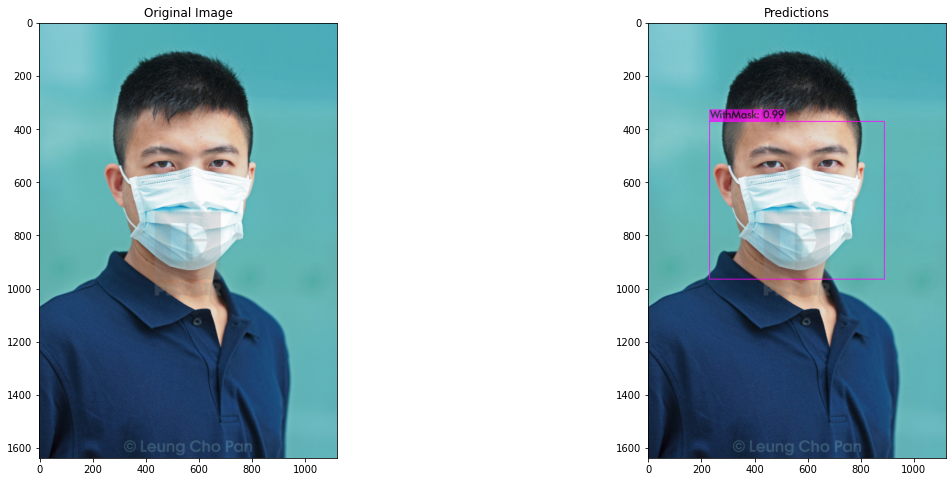

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 96 K-images (1 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
./../test/test-image2.jpg: Predicted in 101.307000 milli-seconds.
WithMask: 99%
WithMask: 97%
NoMask: 93%
WithMask: 87%


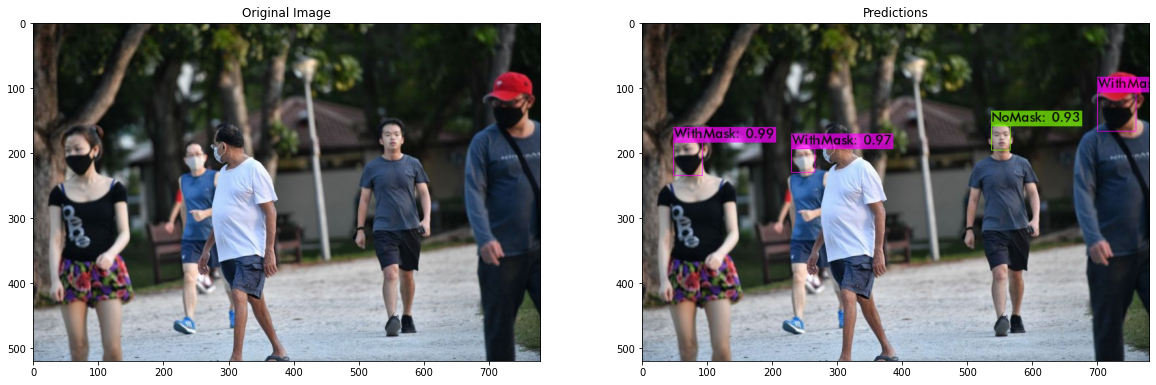

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 96 K-images (1 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
./../test/test-image3.jpg: Predicted in 92.385000 milli-seconds.
WithMask: 78%
WithMask: 99%
WithMask: 98%
NoMask: 80%
WithMask: 100%
WithMask: 97%
WithMask: 98%
WithMask: 93%
WithMask: 99%
WithMask: 92%
WithMask: 85%
WithMask: 96%
WithMask: 100%
WithMask: 95%
WithMask: 99%
WithMask: 100%
WithMask: 95%
WithMask: 97%
WithMask: 100%


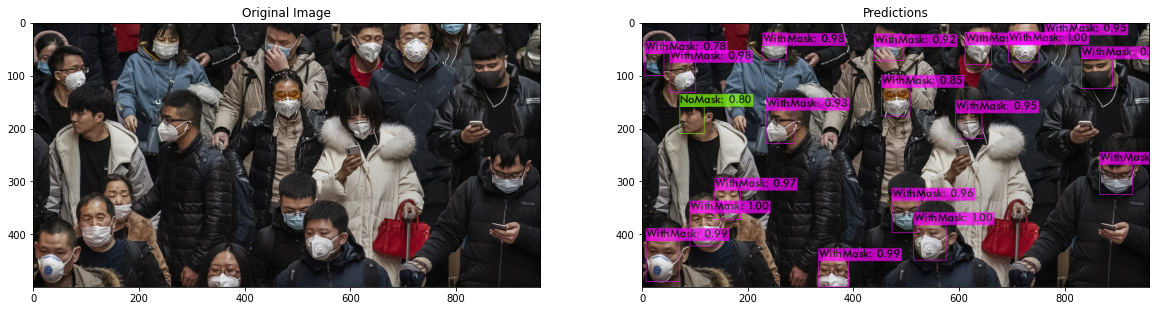

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 96 K-images (1 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
./../test/test-image4.jpg: Predicted in 83.688000 milli-seconds.
NoMask: 81%
NoMask: 85%
WithMask: 95%
NoMask: 79%
WithMask: 99%
WithMask: 98%
WithMask: 99%


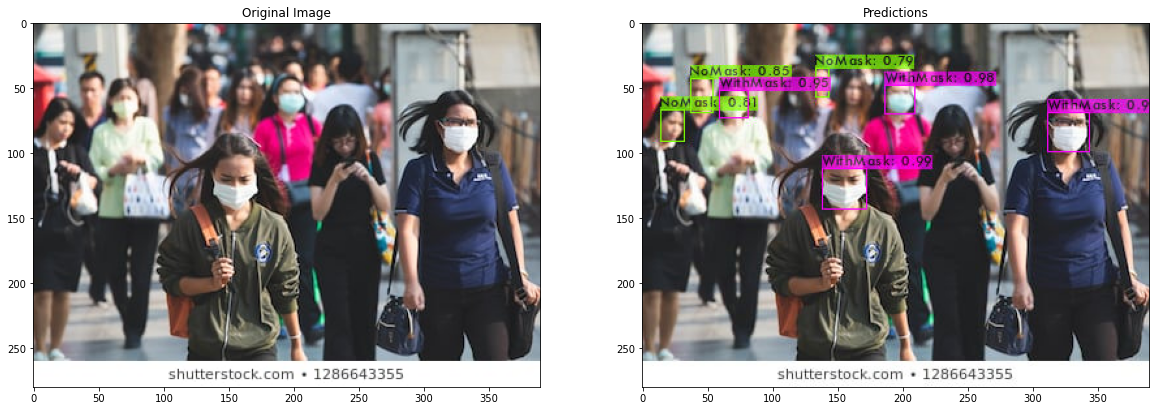

Streaming output truncated to the last 5000 lines.

NoMask: 87% 
NoMask: 84% 
NoMask: 75% 
NoMask: 68% 
WithMask: 97% 
WithMask: 89% 

FPS:12.5 	 AVG_FPS:12.6

 cvWriteFrame 
Objects:

NoMask: 91% 
NoMask: 65% 
NoMask: 61% 
WithMask: 99% 
WithMask: 98% 

FPS:12.7 	 AVG_FPS:12.6

 cvWriteFrame 
Objects:

NoMask: 91% 
NoMask: 73% 
NoMask: 68% 
WithMask: 98% 
WithMask: 97% 

FPS:12.8 	 AVG_FPS:12.6

 cvWriteFrame 
Objects:

NoMask: 91% 
NoMask: 73% 
NoMask: 70% 
NoMask: 65% 
WithMask: 98% 
WithMask: 93% 

FPS:12.6 	 AVG_FPS:12.6

 cvWriteFrame 
Objects:

NoMask: 90% 
NoMask: 83% 
WithMask: 99% 
WithMask: 92% 

FPS:12.5 	 AVG_FPS:12.6

 cvWriteFrame 
Objects:

NoMask: 70% 
WithMask: 99% 
WithMask: 86% 

FPS:12.4 	 AVG_FPS:12.6

 cvWriteFrame 
Objects:

NoMask: 70% 
NoMask: 67% 
WithMask: 99% 
WithMask: 88% 

FPS:12.4 	 AVG_FPS:12.6

 cvWriteFrame 
Objects:

NoMask: 76% 
NoMask: 69% 
NoMask: 66% 
WithMask: 99% 
WithMask: 66% 

FPS:12.3 	 AVG_FPS:12.6

 cvWriteFrame 
Objects:

NoMask: 90% 
N

In [ ]:
#Run the inference
#Copt the labels otherwise the pictures will not have lables correct
execfile('display.py')
!mkdir data
%cd data
!mkdir labels
%cd labels
!cp ./../../../darknet/data/labels/*.* .
%cd ..
%cd ..

!./../darknet/darknet detector test yolov4-mask-setup.data yolov4-test.cfg ./maskbackup/yolov4-obj_best.weights ./../test/test-image1.jpg -thresh .6 -dont_show 2>/dev/null
!mv  predictions.jpg ./output/test-image1_pred.jpg
display_output("./../test/test-image1.jpg","./output/test-image1_pred.jpg")

!./../darknet/darknet detector test yolov4-mask-setup.data yolov4-test.cfg ./maskbackup/yolov4-obj_best.weights ./../test/test-image2.jpg -thresh .6 -dont_show 2>/dev/null
!mv  predictions.jpg ./output/test-image2_pred.jpg
display_output("./../test/test-image2.jpg","./output/test-image2_pred.jpg")

!./../darknet/darknet detector test yolov4-mask-setup.data yolov4-test.cfg ./maskbackup/yolov4-obj_best.weights ./../test/test-image3.jpg -thresh .6 -dont_show 2>/dev/null
!mv  predictions.jpg ./output/test-image3_pred.jpg
display_output("./../test/test-image3.jpg","./output/test-image3_pred.jpg")

!./../darknet/darknet detector test yolov4-mask-setup.data yolov4-test.cfg ./maskbackup/yolov4-obj_best.weights ./../test/test-image4.jpg -thresh .6 -dont_show 2>/dev/null
!mv  predictions.jpg ./output/test-image4_pred.jpg
display_output("./../test/test-image4.jpg","./output/test-image4_pred.jpg")

!./../darknet/darknet detector demo yolov4-mask-setup.data yolov4-test.cfg ./maskbackup/yolov4-obj_best.weights ./../test/test-video1.mp4 -thresh .6 -out_filename ./output/out-vid1.avi -dont_show 2>/dev/null


!./../darknet/darknet detector demo yolov4-mask-setup.data yolov4-test.cfg ./maskbackup/yolov4-obj_best.weights ./../test/test-video2.mp4 -thresh .6 -out_filename ./output/out-vid2.avi -dont_show 2>/dev/null


# New Section

# New Section